In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/canada_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '2001/1/21',
       '2001/2/21', '2001/3/21', '2001/4/21', '2001/5/21', '2001/6/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=103)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0       1       2       3       4       5       6       7       8   \
0   100428  100428  104228  105535  106378  107501  108469  109652  110641   
1    51990   51990   51990   54201   54629   55254   56015   56632   56632   
2        0       0       0       0       0       0       0       0       0   
3       13      13      13      13      13      13      13      13      13   
4    24700   25026   25126   25244   25374   25541   25742   25963   26166   
5      601     611     618     635     662     693     717     735     765   
6      390     390     390     391     392     392     392     392     392   
7       24      24      24      24      24      24      24      24      24   
8     1486    1499    1499    1505    1508    1520    1524    1526    1529   
9      266     266     266     266     266     266     266     266     266   
10  187344  191035  195368  198929  202085  205283  208691  212962  216674   
11      94      94      94      96      97      97     102     1

In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    
print(ay)  
ayT=ay.T
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", ayT, delimiter=",")

[[   0.    0.    0. ...    0.  495.    0.]
 [3800.    0.    0. ...    0.  238.    0.]
 [1307. 2211.    0. ...    0.  284.    5.]
 ...
 [1429. 1293.    0. ...    0.  205.    0.]
 [1521. 1262.    0. ...    0.  372.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [6]:
#The data of Canadian provinces are added and stored in JS files and CSV files
canadadata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
print(canadadata)
confirmed_data=pd.DataFrame(canadadata.sum(axis=0))
print(confirmed_data)
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", confirmed_data, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
confirmed_data.to_json('./covid_canada_daily.js')

    0.000000000000000000e+00  3.800000000000000000e+03  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                      326.0                     100.0   
4                       10.0                       7.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                       13.0                       0.0   
8                        0.0                       0.0   
9                     3691.0                    4333.0   
10                       0.0                       0.0   
11                       0.0                    7663.0   
12                       0.0                       0.0   
13                     495.0                     238.0   
14                       0.0                       0.0   

    1.307000000000000000e+03  8.430000000000000000e+02  \
0            

                                  0
0.000000000000000000e+00     4535.0
3.800000000000000000e+03    12341.0
1.307000000000000000e+03     8751.0
8.430000000000000000e+02     6407.0
1.123000000000000000e+03     6959.0
...                             ...
9.310000000000000000e+02     9793.0
1.351000000000000000e+03     6037.0
1.429000000000000000e+03     6807.0
1.521000000000000000e+03     7561.0
0.000000000000000000e+00.3      0.0

[99 rows x 1 columns]


In [23]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-5]
        print(test_start_date)
        day=[]
        for i in range(0,55):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(test_set_scaled)

2004/5/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
2004/5/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
2004/5/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
x_data_shape (48, 10)
y_data_shape (48,)
Reshaped x_data shape (48, 10, 1)
Reshaped y_data shape (48, 1)
10
2004/5/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
2004/5/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 5

(array([[12341.],
        [ 8751.],
        [ 6407.],
        [ 6959.],
        [ 7259.],
        [ 8054.],
        [ 7404.],
        [ 6472.],
        [ 7686.],
        [ 5489.],
        [ 6264.],
        [ 6480.],
        [ 6095.],
        [ 5642.],
        [ 5534.],
        [ 5946.],
        [ 4572.],
        [ 5032.],
        [ 5433.],
        [ 5184.],
        [ 4521.],
        [ 4216.],
        [ 4875.],
        [ 3675.],
        [ 3861.],
        [ 4345.],
        [ 4284.],
        [ 3727.],
        [ 3472.],
        [ 4147.],
        [ 2680.],
        [ 3008.],
        [ 3400.],
        [ 3740.],
        [ 2916.],
        [ 2856.],
        [ 3534.],
        [ 2488.],
        [ 2929.],
        [ 2826.],
        [ 2365.],
        [ 3492.],
        [ 1920.],
        [ 1512.],
        [ 3956.],
        [ 2284.],
        [ 3020.],
        [ 2758.],
        [ 2277.],
        [ 2079.],
        [ 3180.],
        [ 2946.],
        [ 2515.],
        [ 2748.],
        [ 2816.],
        [ 

In [16]:
covid_19_RNN=tf.keras.models.Sequential()
#input layer
covid_19_RNN.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(x_data.shape[1],1)))
covid_19_RNN.add(tf.keras.layers.Dropout(0.15))
#1st hidden layer
covid_19_RNN.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
covid_19_RNN.add(tf.keras.layers.Dropout(0.13))
#2nd hidden layer
covid_19_RNN.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
covid_19_RNN.add(tf.keras.layers.Dropout(0.1))
#3rd hidden layer
# covid_19_RNN.add(tf.keras.layers.GRU(units=50,return_sequences=True))
# covid_19_RNN.add(tf.keras.layers.Dropout(0.09))
#output layer
covid_19_RNN.add(tf.keras.layers.Dense(units=1))
covid_19_RNN.add(tf.keras.layers.Dense(units=1))
covid_19_RNN.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mse'])
covid_19_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)            

Epoch 1/600
5/5 [==============================] - 1s 180ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 2/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 3/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 4/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 5/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 6/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 7/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 8/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0074 - mse: 0.0

5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 126/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 127/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 128/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 129/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 130/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 131/600
5/5 [==============================] - 0s 13ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 132/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0029 - mse: 0.

5/5 [==============================] - 0s 13ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 250/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 251/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 252/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 253/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 254/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 255/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 256/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - mse: 0.

Epoch 311/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 312/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 313/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 314/600
5/5 [==============================] - 0s 13ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 315/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 316/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 317/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 318/600
5/5 [==============================] - 0s 12ms/step - loss: 0.

Epoch 373/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 374/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 375/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 376/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 377/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 378/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 379/600
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mse: 0.002 - 0s 11ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 380/600
5/5 [===================

Epoch 435/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 436/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 437/600
5/5 [==============================] - 0s 10ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 438/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 439/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 440/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 441/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 442/600
5/5 [==============================] - ETA: 0s - loss: 0.0020 

5/5 [==============================] - 0s 13ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 559/600
5/5 [==============================] - 0s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 560/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 561/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 562/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 563/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 564/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 565/600
5/5 [==============================] - 0s 11ms/step - loss: 0.0026 - mse: 0.

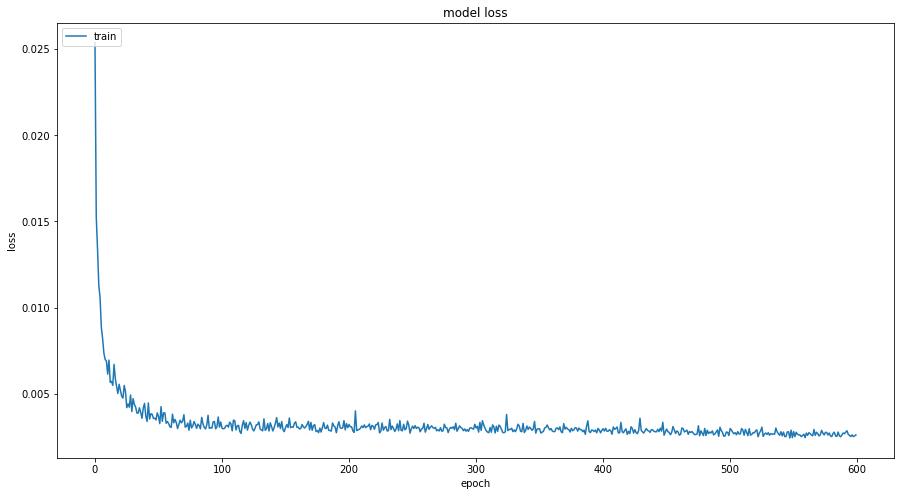

In [17]:

history_rnn=covid_19_RNN.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [18]:
score=covid_19_RNN.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mse %f' % (score[0],score[1]))

1/1 [==============================] - 0s 999us/step - loss: 0.0343 - mse: 0.0343
score is: test_loss 0.034268, mse 0.034268


In [24]:

predicted_covid_19_spread=covid_19_RNN.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)
print("The predicted perday spread from ",test_start_date,"is")
print(predict)
y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)

0.32436365
0.32523727
0.34506887
0.36380246
0.36990345
0.3764139
0.3911447
0.4095365
0.4029246
0.42792553
The predicted perday spread from  2004/5/21 is
[[3176.4932]
 [3185.0486]
 [3379.2595]
 [3562.7175]
 [3622.4644]
 [3686.2214]
 [3830.48  ]
 [4010.591 ]
 [3945.8406]
 [4190.675 ]]


MSE = 0.08831066968830258
R-Squared Score = -1.4796950845561128


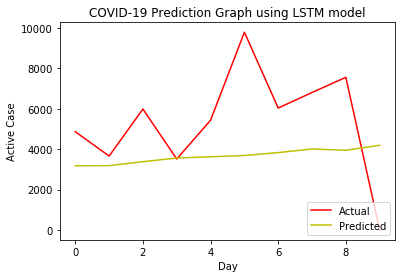

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(covid_19_RNN,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))

def plot_data(y_valid,predict):
    plt.plot(y_valid,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('COVID-19 Prediction Graph using LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)